In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [72]:
def display_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [73]:
gb_image = cv2.imread('D:\\AIO\\AIO-Exercise\\AIO-Exercise\\Module2\\Week2\\Images\\GreenBackground.png')
gb_image = cv2.resize(gb_image, (678, 381))

ob_image = cv2.imread('D:\\AIO\\AIO-Exercise\\AIO-Exercise\\Module2\\Week2\\Images\\Object.png')
ob_image = cv2.resize(ob_image, (678, 381))

newb_image = cv2.imread('D:\\AIO\\AIO-Exercise\\AIO-Exercise\\Module2\\Week2\\Images\\NewBackground.jpg')
newb_image = cv2.resize(newb_image, (678, 381))

In [74]:
def compute_difference(gb_image, ob_image):
    difference_three_channel = cv2.absdiff(gb_image, ob_image)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')

    return difference_single_channel

In [75]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

In [76]:
def replaceBackGround(gb_image, newb_image, ob_image):
    difference_single_channel = compute_difference(gb_image, ob_image)
    binary_mask = computeBinaryMask(difference_single_channel)
    output = np.where(binary_mask==255, ob_image, newb_image)

    return newb_image

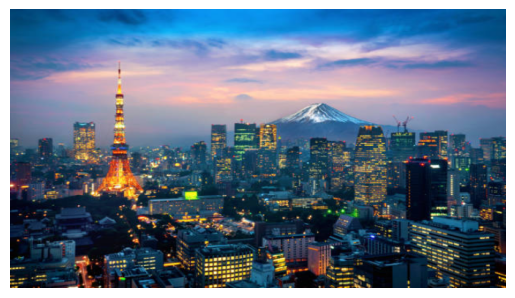

In [77]:
output = replaceBackGround(gb_image, newb_image, ob_image)
display_image(output)